In [107]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [108]:
# load data
X, y = datasets.load_diabetes(return_X_y=True)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
# Define the optimizers
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,clipnorm=1)
momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,clipnorm=1)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

In [135]:
# create model
model_adam = keras.models.Sequential()
model_adam.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_adam.add(keras.layers.Dense(units=1))

model_sgd = keras.models.Sequential()
model_sgd.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_sgd.add(keras.layers.Dense(units=1))

model_adagrad = keras.models.Sequential()
model_adagrad.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_adagrad.add(keras.layers.Dense(units=1))

model_momentum = keras.models.Sequential()
model_momentum.add(keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]))
model_momentum.add(keras.layers.Dense(units=1))


In [136]:
# compile model
model_adam.compile(optimizer=adam, loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])
model_adagrad.compile(optimizer=adagrad, loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])
model_sgd.compile(optimizer=sgd, loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])
model_momentum.compile(optimizer=momentum, loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

In [137]:
# train model
history_adam = model_adam.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_adagrad = model_adagrad.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_sgd = model_sgd.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history_momentum = model_momentum.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 28332.2695 - mean_squared_error: 28332.2695 - val_loss: 27256.4727 - val_mean_squared_error: 27256.4727
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 26374.6348 - mean_squared_error: 26374.6348 - val_loss: 24916.3633 - val_mean_squared_error: 24916.3633
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 23384.2207 - mean_squared_error: 23384.2207 - val_loss: 21384.4805 - val_mean_squared_error: 21384.4805
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 19168.8359 - mean_squared_error: 19168.8359 - val_loss: 16962.6367 - val_mean_squared_error: 16962.6367
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 14584.5732 - mean_squared_error: 14584.5732 - val_loss: 12505.3008 - val_mean_squared_error: 12505.3008
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 10459.8252 - mean_squared_error: 10459.82

In [138]:
# evaluate model
score_adam = model_adam.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Adam: {score_adam["loss"]:.4f}')

score_adagrad = model_adagrad.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Adagrad: {score_adagrad["loss"]:.4f}')

score_sgd = model_sgd.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - SGD: {score_sgd["loss"]:.4f}')

score_momentum  = model_momentum.evaluate(X_test, y_test, return_dict=True)
print(f'Test loss - Momentum: {score_momentum["loss"]:.4f}')

3/3 [==============================] - 0s 2ms/step - loss: 3446.3757 - mean_squared_error: 3446.3757
Test loss - Adam: 3446.3757
3/3 [==============================] - 0s 2ms/step - loss: 9691.9600 - mean_squared_error: 9691.9600
Test loss - Adagrad: 9691.9600
3/3 [==============================] - 0s 2ms/step - loss: 3605.4880 - mean_squared_error: 3605.4880
Test loss - SGD: 3605.4880
3/3 [==============================] - 0s 2ms/step - loss: 3399.8960 - mean_squared_error: 3399.8960
Test loss - Momentum: 3399.8960


In [139]:
# make predictions
predictions_adam = model_adam.predict(X_test)
predictions_adagrad = model_adagrad.predict(X_test)
predictions_sgd = model_sgd.predict(X_test)
predictions_momentum = model_momentum.predict(X_test)

3/3 [==============================] - 0s 2ms/step


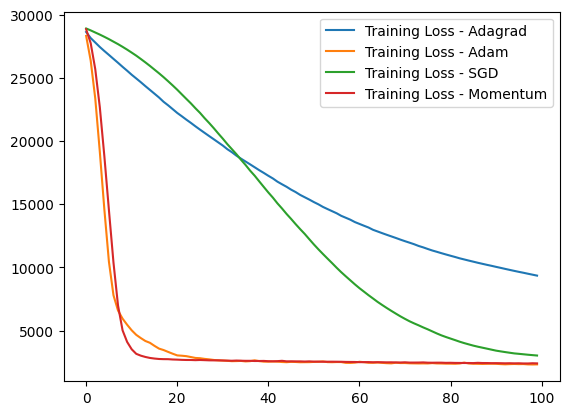

In [140]:
# plot optimization process
plt.plot(history_adagrad.history['loss'], label='Training Loss - Adagrad')
# plt.plot(history_adagrad.history['val_loss'], label='Validation Loss - Adagrad')

plt.plot(history_adam.history['loss'], label='Training Loss - Adam')
# plt.plot(history_adam.history['val_loss'], label='Validation Loss - Adam')

plt.plot(history_sgd.history['loss'], label='Training Loss - SGD')
# plt.plot(history_sgd.history['val_loss'], label='Validation Loss - SGD')

plt.plot(history_momentum.history['loss'], label='Training Loss - Momentum')
# plt.plot(history_momentum.history['val_loss'], label='Validation Loss - Momentum')

plt.legend()



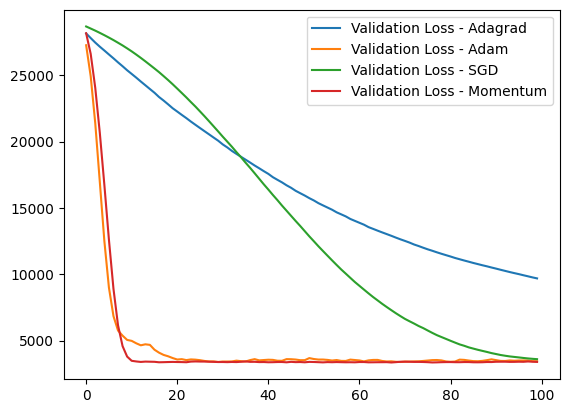

In [141]:
# plot optimization process
# plt.plot(history_adagrad.history['loss'], label='Training Loss - Adagrad')
plt.plot(history_adagrad.history['val_loss'], label='Validation Loss - Adagrad')

# plt.plot(history_adam.history['loss'], label='Training Loss - Adam')
plt.plot(history_adam.history['val_loss'], label='Validation Loss - Adam')

# plt.plot(history_sgd.history['loss'], label='Training Loss - SGD')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss - SGD')

# plt.plot(history_momentum.history['loss'], label='Training Loss - Momentum')
plt.plot(history_momentum.history['val_loss'], label='Validation Loss - Momentum')

plt.legend()

In [2]:
# plot optimization process
plt.plot(history_adagrad.history['mse'], label='Training Acc - Adagrad')
# plt.plot(history_adagrad.history['val_loss'], label='Validation Loss - Adagrad')

plt.plot(history_adam.history['mse'], label='Training Acc - Adam')
# plt.plot(history_adam.history['val_loss'], label='Validation Loss - Adam')

plt.plot(history_sgd.history['mse'], label='Training Acc - SGD')
# plt.plot(history_sgd.history['val_loss'], label='Validation Loss - SGD')

plt.plot(history_momentum.history['mse'], label='Training Acc - Momentum')
# plt.plot(history_momentum.history['val_loss'], label='Validation Loss - Momentum')

plt.legend()



NameError: name 'plt' is not defined

In [3]:
# plot optimization process
# plt.plot(history_adagrad.history['loss'], label='Training Loss - Adagrad')
plt.plot(history_adagrad.history['val_mse'], label='Validation Acc - Adagrad')

# plt.plot(history_adam.history['loss'], label='Training Loss - Adam')
plt.plot(history_adam.history['val_mse'], label='Validation Acc - Adam')

# plt.plot(history_sgd.history['loss'], label='Training Loss - SGD')
plt.plot(history_sgd.history['val_mse'], label='Validation Acc - SGD')

# plt.plot(history_momentum.history['loss'], label='Training Loss - Momentum')
plt.plot(history_momentum.history['val_mse'], label='Validation Acc - Momentum')

plt.legend()

NameError: name 'plt' is not defined